In [ ]:
import pandas as pd
import numpy as np

ruta = '/content/drive/MyDrive/probabilidad /Archivo de Datos.csv'

In [ ]:
bdd = pd.read_csv(ruta)
bdd=bdd.drop(index = 0)
bdd

In [ ]:
for i, columna in enumerate(bdd.columns):
  print(i,columna)

In [ ]:
bdd = bdd[['Edad','Ingreso percapita mensual','Título o diploma que obtuvo']]
bdd = bdd.dropna()
print(bdd.dtypes)
bdd

In [ ]:
bdd['Edad']=bdd['Edad'].astype(int)
bdd['Ingreso percapita mensual']=bdd['Ingreso percapita mensual'].astype(float)
bdd['Título o diploma que obtuvo']=bdd['Título o diploma que obtuvo'].astype(int)
bdd.dtypes
bdd

In [ ]:
bdd=bdd[bdd['Edad'].between(20,60)]
bdd

In [ ]:
g1=bdd[bdd['Título o diploma que obtuvo']==3]
g2=pd.concat([bdd[bdd['Título o diploma que obtuvo']==1], bdd[bdd['Título o diploma que obtuvo'].between(8,10)]])
g1=g1['Ingreso percapita mensual'].rename('G1')
g2=g2['Ingreso percapita mensual'].rename('G2')
print(g1)
print(g1)

In [ ]:
ipcm=pd.concat([g1,g2],axis=1)
ipcm

In [ ]:
tabla=pd.DataFrame({'cantidad':ipcm.count(), 
                    'media':ipcm.mean(),
                    'maximo':ipcm.max(), 
                    'minimo':ipcm.min(), 
                    'rango':ipcm.max()-ipcm.min(),
                    'desv estand':ipcm.std()})
tabla=tabla.astype(int).T
tabla

In [ ]:
salmin=2192839
intervalos=pd.interval_range(start=0,end=ipcm.max().max()+salmin,freq=salmin,closed='left')
for inter in intervalos:
  print(inter)

In [ ]:
distri1['clases']=pd.cut(ipcm['G1'].astype(float),bins=intervalos)
distri2['clases']=pd.cut(ipcm['G2'].astype(float),bins=intervalos)
G=pd.concat([distri1['clases'], distri2['clases']], axis=1)
G=G.apply(pd.Series.value_counts,axis=0)
G

,G1,G2
"[0.0, 2192839.0)",226,754
"[2192839.0, 4385678.0)",64,526
"[4385678.0, 6578517.0)",11,182
"[6578517.0, 8771356.0)",1,60
"[8771356.0, 10964195.0)",0,29
"[10964195.0, 13157034.0)",0,20
"[13157034.0, 15349873.0)",1,9
"[15349873.0, 17542712.0)",1,6
"[17542712.0, 19735551.0)",0,5
"[19735551.0, 21928390.0)",0,5


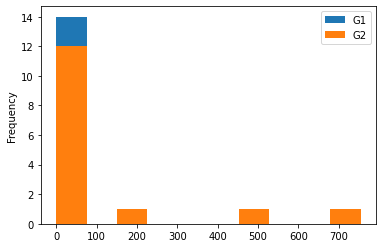

In [ ]:
G.plot.hist(bins=10)